# Evasão de Clientes Telecom X

In [ ]:
# Import ds bibliotecas
import pandas as pd
from pandas.api.types import CategoricalDtype
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import requests
import json

In [ ]:
# Estilização
custom_params = {"axes.spines.right": False, "axes.spines.top": False}

colors = sns.color_palette('deep')
sns.set_theme(style="white", font_scale=1.1, rc=custom_params)
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=colors)

# 1. Extração dos Dados

In [ ]:
url = 'https://raw.githubusercontent.com/ingridcristh/challenge2-data-science/refs/heads/main/TelecomX_Data.json'
response = requests.get(url)
data = response.json()
df_churn = pd.json_normalize(data, sep='_')
df_churn.head()

,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges_Monthly,account_Charges_Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


# 2. Transformação dos Dados

In [ ]:
df_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer_gender            7267 non-null   object 
 3   customer_SeniorCitizen     7267 non-null   int64  
 4   customer_Partner           7267 non-null   object 
 5   customer_Dependents        7267 non-null   object 
 6   customer_tenure            7267 non-null   int64  
 7   phone_PhoneService         7267 non-null   object 
 8   phone_MultipleLines        7267 non-null   object 
 9   internet_InternetService   7267 non-null   object 
 10  internet_OnlineSecurity    7267 non-null   object 
 11  internet_OnlineBackup      7267 non-null   object 
 12  internet_DeviceProtection  7267 non-null   object 
 13  internet_TechSupport       7267 non-null   objec

In [ ]:
df_churn = df_churn.map(lambda x: x.strip() if isinstance(x, str) else x)
df_churn = df_churn.replace('', np.nan)


In [ ]:
df_churn.duplicated().sum()

np.int64(0)

In [ ]:
df_churn.isnull().sum()

,0
customerID,0
Churn,224
customer_gender,0
customer_SeniorCitizen,0
customer_Partner,0
customer_Dependents,0
customer_tenure,0
phone_PhoneService,0
phone_MultipleLines,0
internet_InternetService,0


In [ ]:
# Excluir linhas que tem dados vázios
df_churn = df_churn.dropna().copy()

In [ ]:
df_churn.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7032 non-null   object 
 1   Churn                      7032 non-null   object 
 2   customer_gender            7032 non-null   object 
 3   customer_SeniorCitizen     7032 non-null   int64  
 4   customer_Partner           7032 non-null   object 
 5   customer_Dependents        7032 non-null   object 
 6   customer_tenure            7032 non-null   int64  
 7   phone_PhoneService         7032 non-null   object 
 8   phone_MultipleLines        7032 non-null   object 
 9   internet_InternetService   7032 non-null   object 
 10  internet_OnlineSecurity    7032 non-null   object 
 11  internet_OnlineBackup      7032 non-null   object 
 12  internet_DeviceProtection  7032 non-null   object 
 13  internet_TechSupport       7032 non-null   object 
 1

In [ ]:
# Padronizando o nome das colunas
df_churn.columns = df_churn.columns.str.lower().str.replace('customer_', '').str.replace('phone_','').str.replace('internet_', '').str.replace('account_', '')
df_churn['charges_total'] = df_churn['charges_total'].astype(float)

# Criando a coluna de contas diarias
df_churn['charges_daily'] = df_churn['charges_monthly'] / 30


In [ ]:
df_churn.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerid        7032 non-null   object 
 1   churn             7032 non-null   object 
 2   gender            7032 non-null   object 
 3   seniorcitizen     7032 non-null   int64  
 4   partner           7032 non-null   object 
 5   dependents        7032 non-null   object 
 6   tenure            7032 non-null   int64  
 7   phoneservice      7032 non-null   object 
 8   multiplelines     7032 non-null   object 
 9   internetservice   7032 non-null   object 
 10  onlinesecurity    7032 non-null   object 
 11  onlinebackup      7032 non-null   object 
 12  deviceprotection  7032 non-null   object 
 13  techsupport       7032 non-null   object 
 14  streamingtv       7032 non-null   object 
 15  streamingmovies   7032 non-null   object 
 16  contract          7032 non-null   object 
 17  

In [ ]:
for col in df_churn.columns:
    print(f'{col}:{df_churn[col].unique()}')

customerid:['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']
churn:['No' 'Yes']
gender:['Female' 'Male']
seniorcitizen:[0 1]
partner:['Yes' 'No']
dependents:['Yes' 'No']
tenure:[ 9  4 13  3 71 63  7 65 54 72  5 56 34  1 45 50 23 55 26 69 37 49 66 67
 20 43 59 12 27  2 25 29 14 35 64 39 40 11  6 30 70 57 58 16 32 33 10 21
 61 15 44 22 24 19 47 62 46 52  8 60 48 28 41 53 68 31 36 17 18 51 38 42]
phoneservice:['Yes' 'No']
multiplelines:['No' 'Yes' 'No phone service']
internetservice:['DSL' 'Fiber optic' 'No']
onlinesecurity:['No' 'Yes' 'No internet service']
onlinebackup:['Yes' 'No' 'No internet service']
deviceprotection:['No' 'Yes' 'No internet service']
techsupport:['Yes' 'No' 'No internet service']
streamingtv:['Yes' 'No' 'No internet service']
streamingmovies:['No' 'Yes' 'No internet service']
contract:['One year' 'Month-to-month' 'Two year']
paperlessbilling:['Yes' 'No']
paymentmethod:['Mailed check' 'Electronic check' 'Credit card (automatic)'
 'B

In [ ]:
# Transformando a binarização das colunas
df_churn['churn_bin'] = df_churn['churn'].map({'No': 0, 'Yes': 1})
df_churn['seniorcitizen'] = df_churn['seniorcitizen'].astype(int)
df_churn['seniorcitizen'] = df_churn['seniorcitizen'].map({0: 'No', 1: 'Yes'})


In [ ]:
# Transformando as colunas categoricas
cat_cols = ['gender', 'partner', 'dependents', 'phoneservice', 'multiplelines',
            'internetservice', 'onlinesecurity', 'onlinebackup',
            'deviceprotection', 'techsupport', 'streamingtv', 'streamingmovies',
            'paperlessbilling', 'paymentmethod', 'seniorcitizen']

for col in cat_cols:
    df_churn[col] = df_churn[col].astype('category')


# Transformando as colunas categoricas ordenadas
ordem_contratos = ['Month-to-month', 'One year', 'Two year']
tipo_ordenado = CategoricalDtype(categories=ordem_contratos, ordered=True)

df_churn['contract'] = df_churn['contract'].astype(tipo_ordenado)

In [ ]:
df_churn.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7266
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   customerid        7032 non-null   object  
 1   churn             7032 non-null   object  
 2   gender            7032 non-null   category
 3   seniorcitizen     7032 non-null   category
 4   partner           7032 non-null   category
 5   dependents        7032 non-null   category
 6   tenure            7032 non-null   int64   
 7   phoneservice      7032 non-null   category
 8   multiplelines     7032 non-null   category
 9   internetservice   7032 non-null   category
 10  onlinesecurity    7032 non-null   category
 11  onlinebackup      7032 non-null   category
 12  deviceprotection  7032 non-null   category
 13  techsupport       7032 non-null   category
 14  streamingtv       7032 non-null   category
 15  streamingmovies   7032 non-null   category
 16  contract          7032 non-nu

# 2. Analise Descritiva

In [ ]:
df_churn.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
customerid,7032,7032,9995-HOTOH,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
churn,7032,2,No,5163,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,7032,2,Male,3549,NaN,NaN,NaN,NaN,NaN,NaN,NaN
seniorcitizen,7032,2,No,5890,NaN,NaN,NaN,NaN,NaN,NaN,NaN
partner,7032,2,No,3639,NaN,NaN,NaN,NaN,NaN,NaN,NaN
dependents,7032,2,No,4933,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tenure,7032.0,NaN,NaN,NaN,32.421786,24.54526,1.0,9.0,29.0,55.0,72.0
phoneservice,7032,2,Yes,6352,NaN,NaN,NaN,NaN,NaN,NaN,NaN
multiplelines,7032,3,No,3385,NaN,NaN,NaN,NaN,NaN,NaN,NaN
internetservice,7032,3,Fiber optic,3096,NaN,NaN,NaN,NaN,NaN,NaN,NaN


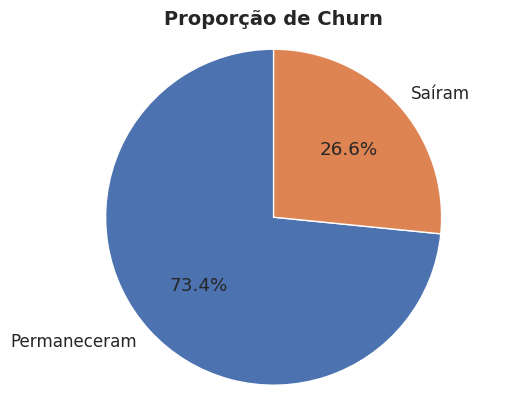

In [ ]:
# Distribuição da Evasão
labels = ['Permaneceram', 'Saíram']
sizes = df_churn['churn_bin'].value_counts().sort_index()

plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Proporção de Churn', fontsize=14, fontweight='bold')
plt.axis('equal')
plt.show()

Podemos observar que a maioria dos clientes presente no conjunto de dados permaneceram na empresa.

## Análise de Evasão por Variáveis Categóricas

In [ ]:
def plot_categorica_por_churn(coluna):
    plt.figure(figsize=(9, 5))
    ax = sns.countplot(data=df_churn, x=coluna, hue='churn_bin')
    plt.title(f'Distribuição de Churn por {coluna.capitalize()}', loc='left', fontsize=14, fontweight='bold')
    plt.xlabel('')
    plt.ylabel('')
    plt.legend(title='Churn', labels=['Ficaram', 'Saíram'])
    plt.yticks([])

    total = len(df_churn)
    for p in ax.patches:
      height = p.get_height()
      if height == 0:
          continue  # Pula a barra invisível
      percentual = 100 * height / total
      ax.annotate(f'{percentual:.1f}%',
                  (p.get_x() + p.get_width() / 2., height),
                  ha='center', va='bottom', fontsize=10, fontweight='bold')

    plt.tight_layout()
    plt.savefig(f'/content/{col}.png', format='png', dpi=300)
    plt.show()

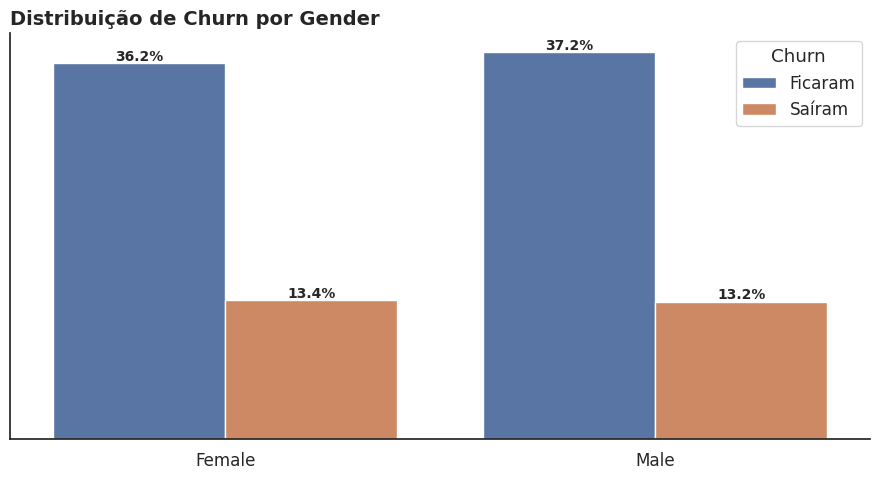

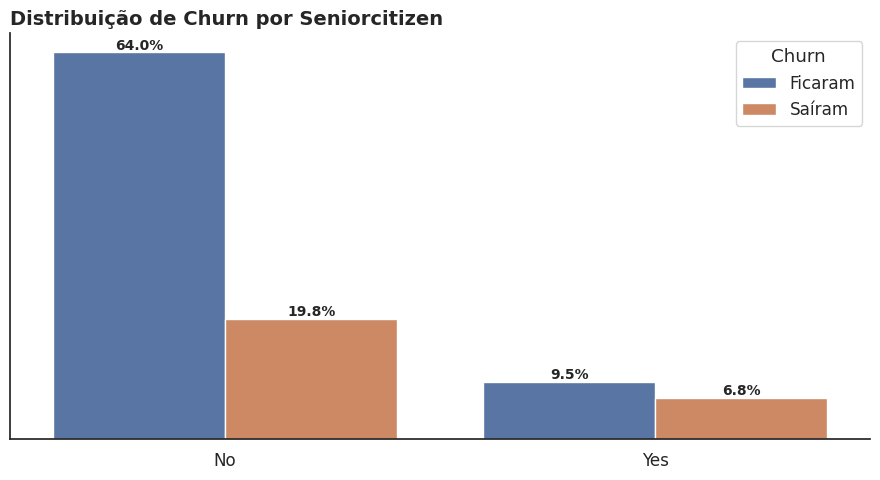

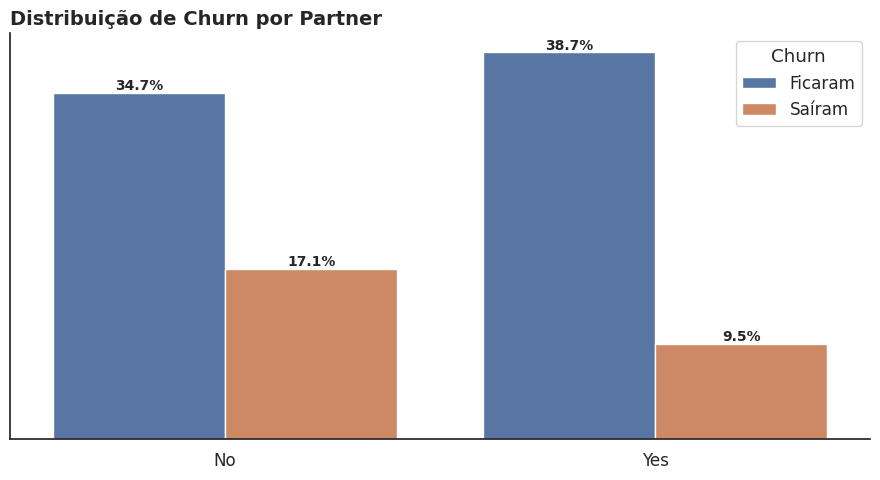

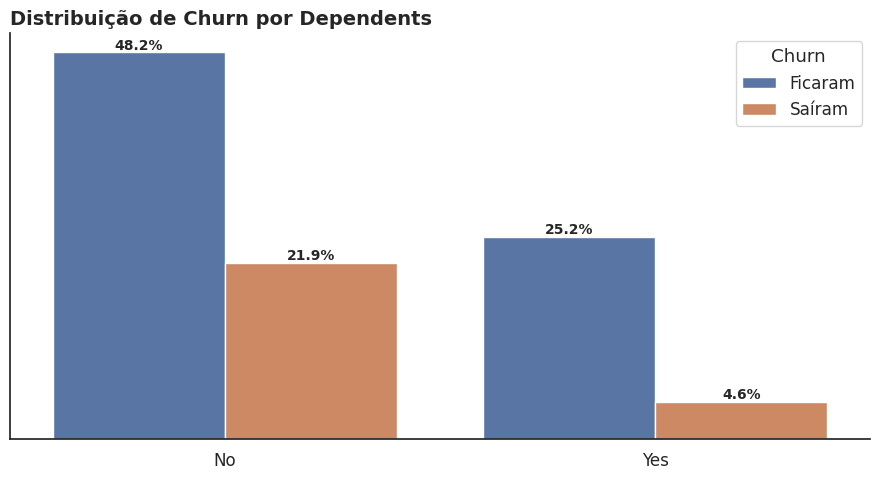

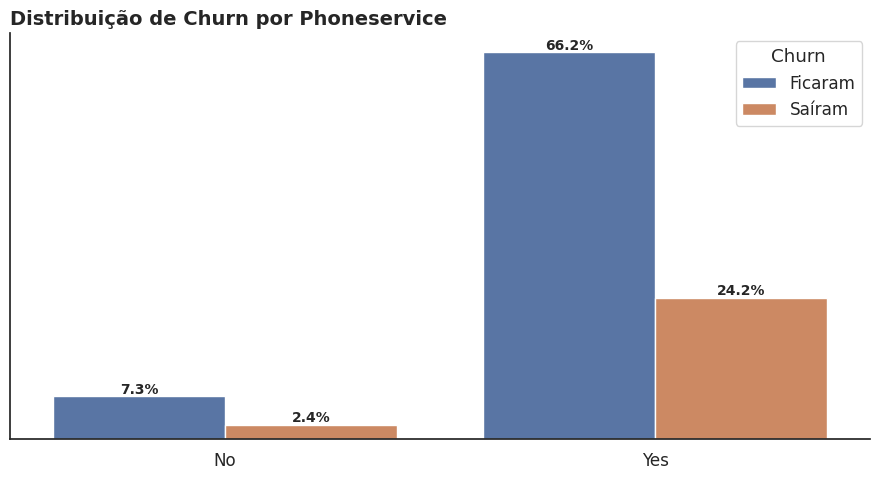

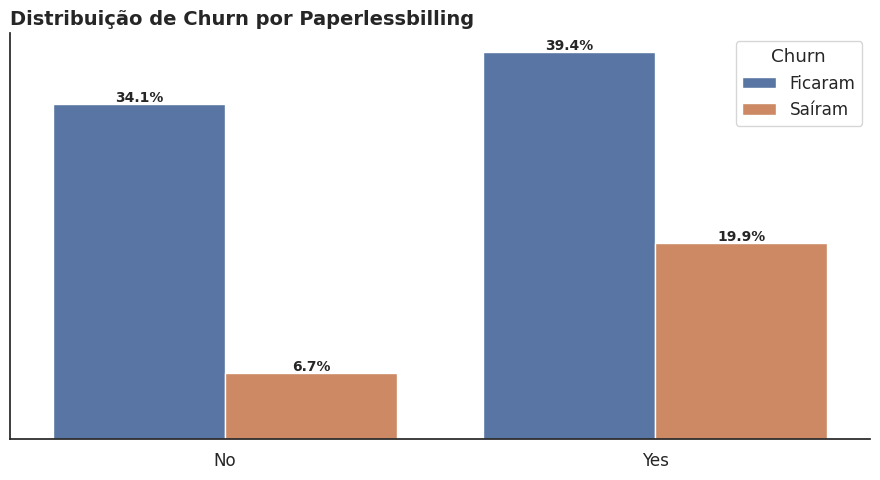

In [ ]:
variaveis_cat = ['gender', 'seniorcitizen', 'partner', 'dependents', 'phoneservice','paperlessbilling']

for col in variaveis_cat:
    plot_categorica_por_churn(col)


In [ ]:
variaveis_multiclasse = ['multiplelines', 'internetservice', 'onlinesecurity', 'onlinebackup',
                         'deviceprotection', 'techsupport', 'streamingtv', 'streamingmovies',
                         'contract', 'paymentmethod']

for col in variaveis_multiclasse:
    resumo = (df_churn.groupby(col, observed=True)['churn_bin']
                      .mean()
                      .mul(100)
                      .round(1)
                      .reset_index()
                      .rename(columns={'churn_bin': 'churn_rate (%)'})
                  )
    display(resumo)
    print('\n\n')


,multiplelines,churn_rate (%)
0,No,25.1
1,No phone service,25.0
2,Yes,28.6


,internetservice,churn_rate (%)
0,DSL,19.0
1,Fiber optic,41.9
2,No,7.4


,onlinesecurity,churn_rate (%)
0,No,41.8
1,No internet service,7.4
2,Yes,14.6


,onlinebackup,churn_rate (%)
0,No,39.9
1,No internet service,7.4
2,Yes,21.6


,deviceprotection,churn_rate (%)
0,No,39.1
1,No internet service,7.4
2,Yes,22.5


,techsupport,churn_rate (%)
0,No,41.6
1,No internet service,7.4
2,Yes,15.2


,streamingtv,churn_rate (%)
0,No,33.5
1,No internet service,7.4
2,Yes,30.1


,streamingmovies,churn_rate (%)
0,No,33.7
1,No internet service,7.4
2,Yes,30.0


,contract,churn_rate (%)
0,Month-to-month,42.7
1,One year,11.3
2,Two year,2.8


,paymentmethod,churn_rate (%)
0,Bank transfer (automatic),16.7
1,Credit card (automatic),15.3
2,Electronic check,45.3
3,Mailed check,19.2


## Análise de Evasão por Variáveis Categóricas

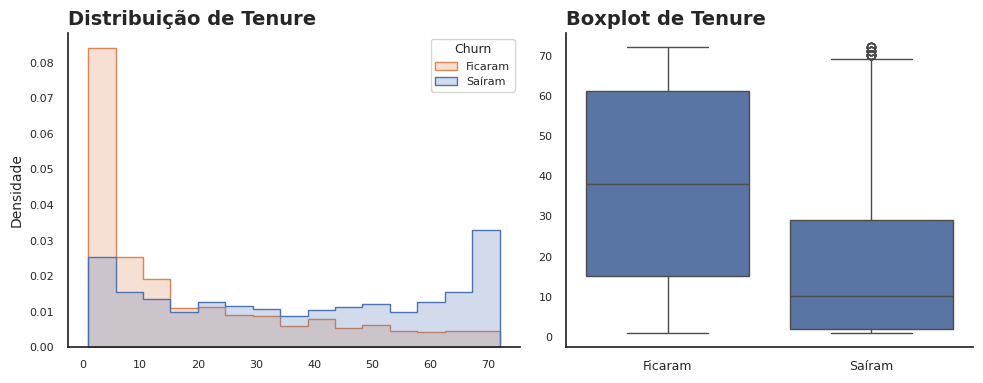

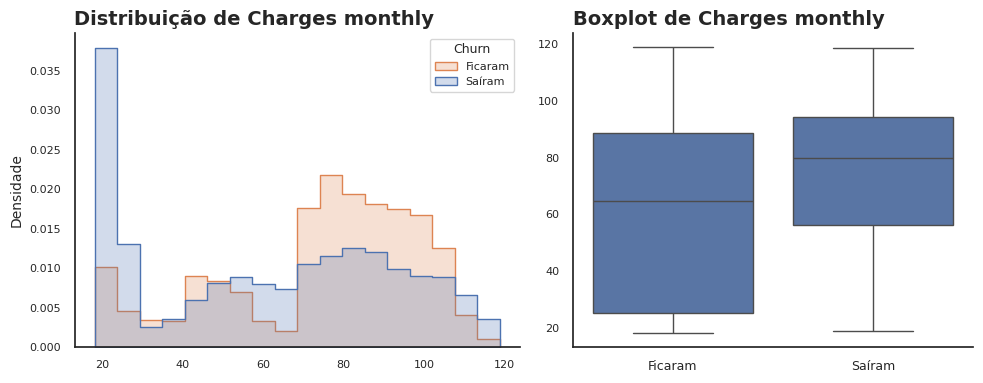

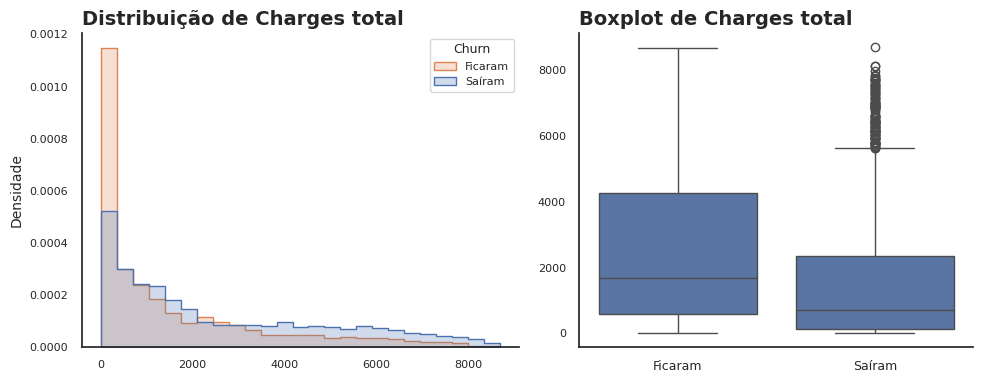

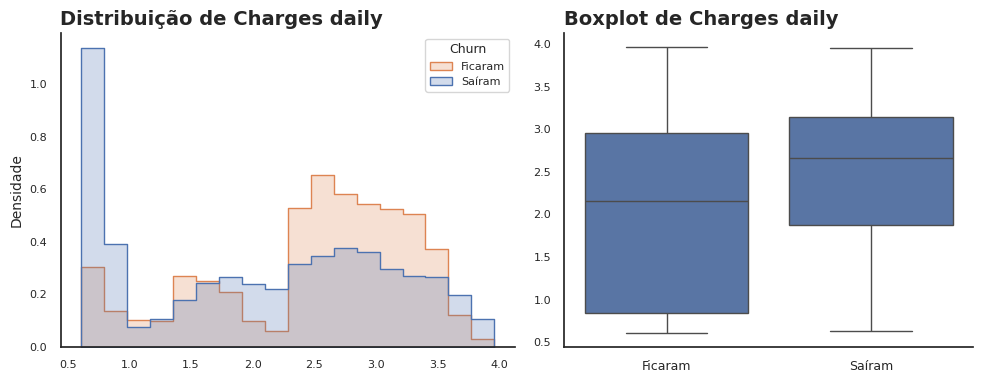

In [ ]:
def comparar_variavel_por_churn(coluna):
    fig, axes = plt.subplots(1, 2, figsize=(10, 4), gridspec_kw={'width_ratios': [1, 0.9]})

    # Histograma mais limpo
    sns.histplot(data=df_churn, x=coluna, hue='churn_bin', element='step',
                 stat='density', common_norm=False, ax=axes[0])
    axes[0].set_title(f'Distribuição de {coluna.replace("_", " ").capitalize()}', loc='left', fontsize=14, fontweight='bold')
    axes[0].set_xlabel('')
    axes[0].set_ylabel('Densidade', fontsize=10)
    axes[0].legend(title='Churn', labels=['Ficaram', 'Saíram'], fontsize=8, title_fontsize=9, loc='upper right')
    axes[0].tick_params(axis='x', labelsize=8)
    axes[0].tick_params(axis='y', labelsize=8)

    # Boxplot
    sns.boxplot(data=df_churn, x='churn_bin', y=coluna, ax=axes[1])
    axes[1].set_title(f'Boxplot de {coluna.replace("_", " ").capitalize()}', loc='left', fontsize=14, fontweight='bold')
    axes[1].set_xticks([0, 1])
    axes[1].set_xticklabels(['Ficaram', 'Saíram'], fontsize=9)
    axes[1].set_xlabel('')
    axes[1].set_ylabel('')
    axes[1].tick_params(axis='y', labelsize=8)

    plt.tight_layout(pad=1)
    plt.show()



variaveis_numericas = ['tenure', 'charges_monthly', 'charges_total', 'charges_daily']

for col in variaveis_numericas:
    comparar_variavel_por_churn(col)

#🧾 Relatório Final: Análise de Evasão de Clientes


## 1. Introdução

O objetivo principal deste estudo é aprofundar o entendimento da análise de churn, ou seja, da evasão de clientes, em uma base de dados do setor de telecomunicações. Por meio de uma Análise Exploratória de Dados (EDA), buscamos identificar os principais padrões e fatores que influenciam a decisão de cancelamento.

Serão examinadas diversas variáveis, incluindo o perfil demográfico dos clientes, a composição dos serviços contratados e o histórico de pagamentos. Os insights gerados por essa análise são cruciais para a elaboração de estratégias de retenção mais assertivas, contribuindo diretamente para a minimização de perdas financeiras e para a sustentabilidade do negócio.

## 2. Limpeza e Tratamento do Dados

Para a preparação dos dados, as linhas com valores ausentes foram inicialmente removidas, garantindo a consistência da análise. Em seguida, as variáveis binárias com respostas 'Yes'/'No' foram padronizadas para manter uniformidade na interpretação.

A coluna que indicava se o cliente tinha 65 anos ou mais também foi ajustada para seguir o mesmo padrão de 'Yes' e 'No', facilitando a leitura e a análise posterior. A variável-alvo que representa a evasão de clientes foi convertida para um formato binário, utilizando 0 para indicar clientes que permaneceram e 1 para os que cancelaram o serviço.

Por fim, as caracteristicas dos clientes foram classificadas em dois grandes grupos: variáveis numéricas e variáveis categóricas, que seram exploradas nas etapas seguintes da análise.

## 3. Análise Exploratória de Dados

Para iniciar a investigação, utilizamos a Análise Exploratória de Dados. Essa metodologia nos permitiu uma primeira visualização do conjunto de dados, o que foi fundamental para entender a distribuição das variáveis e identificar padrões que podem influenciar a evasão de clientes (churn). Os gráficos e as estatísticas geradas nesta seção oferecem um panorama detalhado que orientará as próximas etapas do estudo.

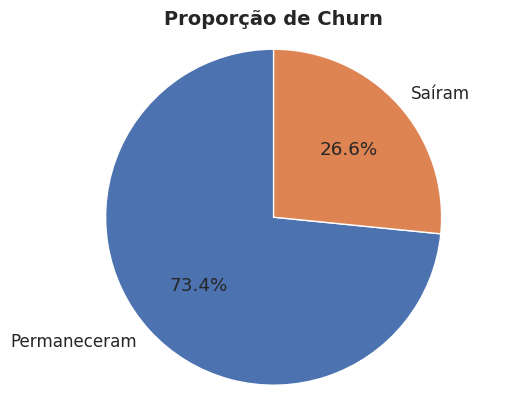

In [ ]:
# @title ## 3.1 Distribuição da Evasão

# Distribuição da Evasão
labels = ['Permaneceram', 'Saíram']
sizes = df_churn['churn_bin'].value_counts().sort_index()

plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Proporção de Churn', fontsize=14, fontweight='bold')
plt.axis('equal')
plt.show()

A análise da distribuição de evasão revela que aproximadamente 26,6% dos clientes cancelaram o serviço, enquanto 73,4% permaneceram ativos. Essa distribuição é visualmente representada no gráfico acima. Embora a maioria dos clientes tenha sido retida, a taxa de churn de 26,6% é significativa e indica a necessidade de atenção. Esse percentual sugere que, a cada quatro clientes, aproximadamente um está optando por encerrar o vínculo com a empresa, o que pode representar impacto financeiro considerável, especialmente em mercados altamente competitivos como de telecomunicações. Esa métrica serve como referência para todas as demais análises do estudo, que buscam identificar os fatores que mais influenciam esse comportamento de evasão e orientar estratégias para sua redução.


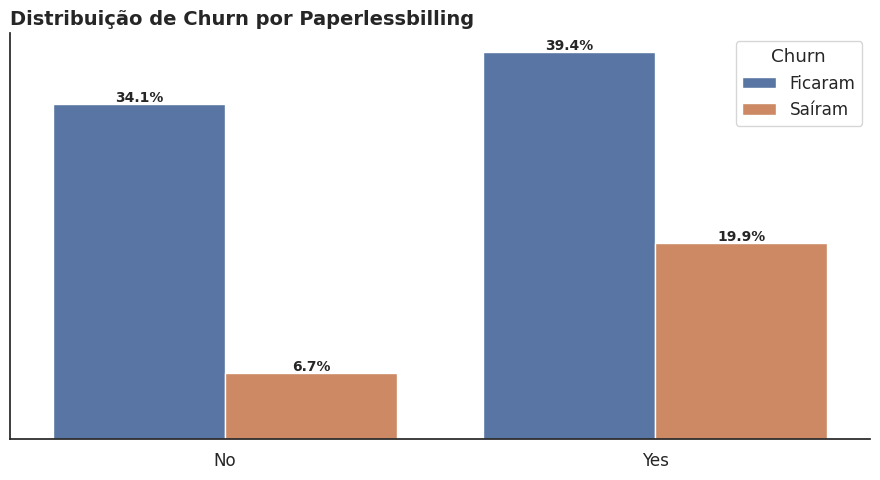

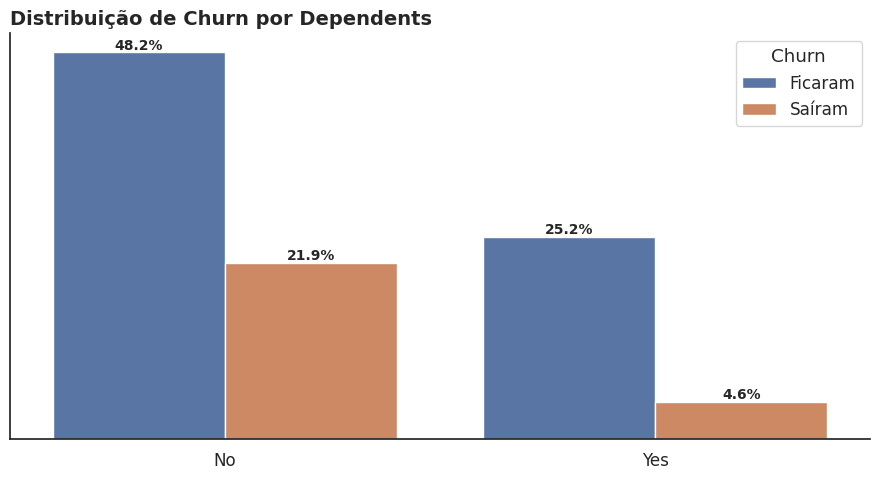

In [ ]:
# @title 3.2 Relação variaveis sociais com a Evasão de clientes
plot_categorica_por_churn('paperlessbilling')
plot_categorica_por_churn('dependents')

As analises das variaveis revelam que clientes que optam por fatura digital apresentaram uma taxa de evasão significativamente maior (19,9%) do que os que recebem fatura em papel (6,7%), sugerindo que **o modelo digital pode não estar sendo bem compreendido ou aceito por parte dos clientes**. Seria importante para a empresa a revisão na comunicação ou formato de entrega.

Observa-se, também,  uma elevada taxa de evasão entre clientes sem dependentes (21,9%), enquanto apenas 4,6% dos clientes com dependentes cancelaram o serviço. Isso pode **indicar que o perfil familiar pode estar associado a maior fidelidade e pode ser utilizado como critério em campanhas de retenção**. Observem os gráficos abaixo:

In [ ]:
# @title 3.3 Análise da Relação entre Serviços Digitais e o Churn de Clientes
servicos_digitais = ['internetservice', 'onlinesecurity', 'techsupport']

for col in servicos_digitais:
    resumo = (df_churn.groupby(col, observed=True)['churn_bin']
                      .mean()
                      .mul(100)
                      .round(1)
                      .reset_index()
                      .rename(columns={'churn_bin': 'churn_rate (%)'})
                  )
    display(resumo)
    print('\n\n')

,internetservice,churn_rate (%)
0,DSL,19.0
1,Fiber optic,41.9
2,No,7.4


,onlinesecurity,churn_rate (%)
0,No,41.8
1,No internet service,7.4
2,Yes,14.6


,techsupport,churn_rate (%)
0,No,41.6
1,No internet service,7.4
2,Yes,15.2


A análise dos serviços digitais contratados pelos clientes revela correlações importantes com a taxa de churn. Clientes que não possuem serviço de internet apresentam a menor taxa de evasão (7,4%), indicando uma base mais estável, embora esse grupo provavelmente represente uma parcela menor dos consumidores.

Entre os que possuem internet, usuários de fibra óptica demonstram maior propensão a evasão (41,9%), contrastando com os usuários de DSL, cuja taxa é de 19%. Esse comportamento pode estar relacionado a diferentes perfis de consumo ou expectativas de qualidade associadas ao serviço de fibra.

Além disso, observa-se que a falta de serviços adicionais, como segurança online e suporte técnico, está associada a altas taxas de cancelamento (41,8% e 41,6%, respectivamente). Por outro lado, clientes que contratam essas funcionalidades apresentam taxas significativamente menores de evasão: 14,6% para segurança online e 15,2% para suporte técnico.

Esses dados sugerem que a adesão a serviços complementares pode ter efeito positivo na fidelização, indicando uma oportunidade estratégica de incentivo a esses produtos como forma de mitigar cancelamentos.

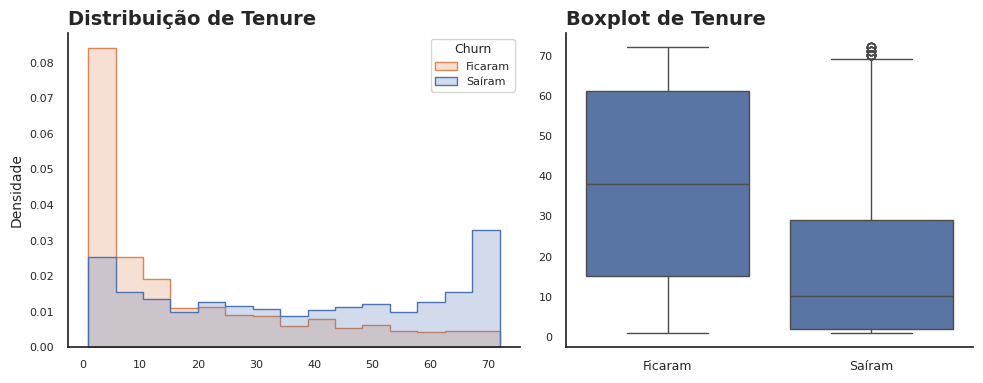

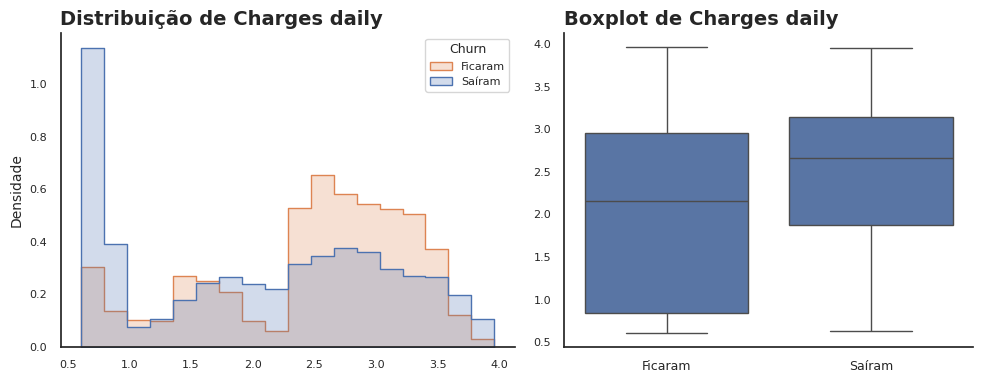

In [ ]:
# @title 3.4 Análise de Variáveis Numéricas
comparar_variavel_por_churn('tenure')
comparar_variavel_por_churn('charges_daily')


A análise dos meses de contrato do cliente revela um padrão bastante consistente: clientes que permaneceram na empresa tendem a ter um tempo de vínculo significativamente maior, com mediana próxima a 38 meses. Por outro lado, clientes que cancelaram seus contratos apresentam, em sua maioria, tempo de contrato muito baixos, concentrando-se nos primeiros meses de relacionamento. Essa distribuição indica que o **risco de evasão é particularmente elevado nos estágios iniciais do ciclo de contrato do cliente**. Estratégias de retenção voltadas para os primeiros meses de contrato podem, portanto, ter alto impacto na redução do churn.

A variável criada para representar uma média aproximada de gasto diário, também apresentou um comportamento relevante. Clientes que cancelaram o serviço possuem uma mediana de gasto diário ligeiramente superior àqueles que permaneceram, sugerindo que **clientes com custos mais elevados podem estar mais propensos à evasão**. Essa informação pode indicar uma **sensibilidade ao preço ou à percepção de custo-benefício dos serviços prestados**. Avaliar a estrutura tarifária e os benefícios percebidos por clientes de maior gasto pode ser uma via estratégica para reduzir o churn nesse segmento.

# 4. Conclusão

A análise exploratória da base de dados de telecomunicações revelou insights cruciais sobre a evasão de clientes (churn). O estudo demonstrou que a **taxa de cancelamento atinge 26,6%**, um índice que ressalta a urgência em implementar estratégias de retenção.

Dentre os principais fatores identificados, o tempo de permanência se mostrou um indicador crítico, com taxas de evasão significativamente mais altas entre os clientes de menor tempo de contrato. Isso sugere que o **início do relacionamento é um período-chave para a fidelização**. Além disso, o perfil de gasto também se mostrou relevante, pois **clientes com maior gasto diário apresentaram uma maior propensão à evasão**, o que pode estar associado a uma percepção negativa do custo-benefício.

Observou-se, ainda, que a contratação de **serviços adicionais e a tecnologia de internet são diferenciais importantes**. Clientes que não aderiram a serviços extras, como suporte técnico ou segurança online, e aqueles que utilizam internet de fibra óptica, demonstraram maior tendência ao churn. Por fim, fatores demográficos e comportamentais, como clientes sem dependentes, sem parceiros e que optam por faturas eletrônicas, foram associados a uma maior probabilidade de evasão.

Esses resultados sublinham a necessidade de uma abordagem estratégica e segmentada na retenção de clientes, com foco em ações direcionadas aos novos usuários, na oferta de pacotes de serviços complementares e na revisão de políticas de precificação. A compreensão desses padrões é fundamental para otimizar os esforços de retenção e mitigar as perdas futuras.

In [ ]:
# Extrair os dados para a próxima etapa

df_churn.to_csv('df_churn.csv', index=False)